# Ejercicio 1

Libreras

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Datos

In [2]:
file_path = './vehicles.csv'
df = pd.read_csv(file_path, low_memory=False)
MPG_TO_KML = 1.60934 / 3.78541
df['UHighway_kml'] = df['UHighway'] * MPG_TO_KML

## Inciso A

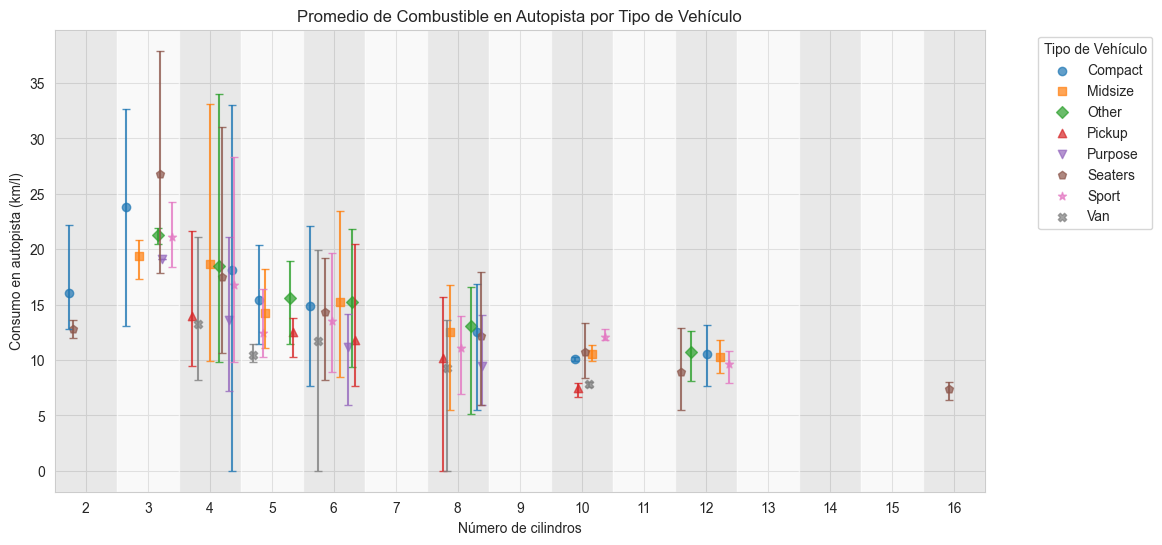

In [3]:
def categorize_vehicle(vclass):
    vclass = vclass.lower()
    if 'van' in vclass:
        return 'Van'
    elif 'compact' in vclass:
        return 'Compact'
    elif 'sport' in vclass:
        return 'Sport'
    elif 'purpose' in vclass:
        return 'Purpose'
    elif 'pickup' in vclass:
        return 'Pickup'
    elif 'midsize' in vclass:
        return 'Midsize'
    elif 'seater' in vclass:
        return 'Seaters'
    else:
        return 'Other'

# Aplicar la categorización
df['GeneralVClass'] = df['VClass'].apply(categorize_vehicle)

# Calcular el promedio, mínimo y máximo del consumo para cada categoría y número de cilindros
consumption_stats = df.groupby(['GeneralVClass', 'cylinders'])['UHighway_kml'].agg(['mean', 'min', 'max']).reset_index()

# Diccionario de marcadores y colores para cada categoría general
unique_classes = consumption_stats['GeneralVClass'].unique()
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X', '<', '>']
colors = plt.cm.tab10.colors  
marker_dict = {vclass: markers[i % len(markers)] for i, vclass in enumerate(unique_classes)}
color_dict = {vclass: colors[i % len(colors)] for i, vclass in enumerate(unique_classes)}

# Configurar el estilo de la gráfica
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = plt.gca()

# Dibujar rectángulos para cada número de cilindros
min_cyl = int(consumption_stats['cylinders'].min())
max_cyl = int(consumption_stats['cylinders'].max())

for cyl in range(min_cyl, max_cyl + 1):
    # Alternar colores para mejor visualización
    color = 'lightgray' if cyl % 2 == 0 else 'whitesmoke'
    ax.axvspan(cyl - 0.5, cyl + 0.5, facecolor=color, alpha=0.5)

# Función para aplicar jitter y evitar superposiciones
def jitter(values, jitter_amount=0.4):  
    return values + np.random.uniform(-jitter_amount, jitter_amount, size=values.shape)

# Graficar cada tipo de vehículo con un marcador distinto y barras de error del mismo color
for vclass in unique_classes:
    subset = consumption_stats[consumption_stats['GeneralVClass'] == vclass]
    
    # Aplicar jitter a los cilindros
    jittered_cylinders = jitter(subset['cylinders'])

    # Graficar puntos con el promedio
    plt.scatter(jittered_cylinders, subset['mean'], 
                label=vclass, marker=marker_dict[vclass], alpha=0.7, color=color_dict[vclass])
    
    # Agregar barras de error con el mismo color del marcador
    plt.errorbar(jittered_cylinders, subset['mean'], 
                 yerr=[subset['mean'] - subset['min'], subset['max'] - subset['mean']], 
                 fmt='none', ecolor=color_dict[vclass], alpha=0.8, capsize=3)

plt.xlabel("Número de cilindros")
plt.ylabel("Consumo en autopista (km/l)")
plt.title("Promedio de Combustible en Autopista por Tipo de Vehículo")
plt.xticks(range(min_cyl, max_cyl + 1))
plt.legend(title="Tipo de Vehículo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(min_cyl - 0.5, max_cyl + 0.5)
plt.show()

## Inciso B


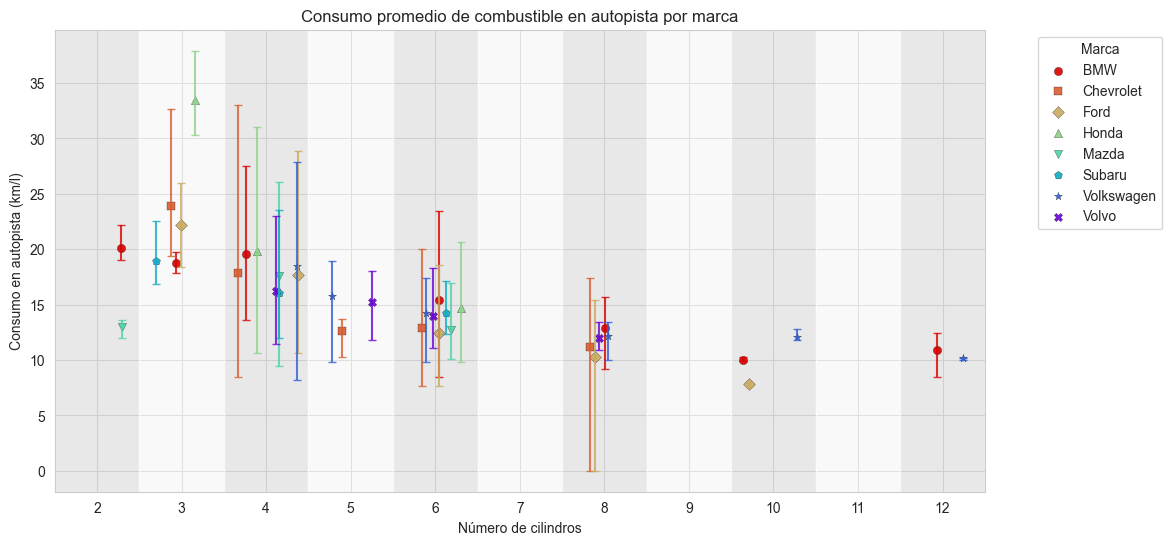

In [4]:
brands = ["BMW", "Chevrolet", "Ford", "Honda", "Mazda", "Subaru", "Volkswagen", "Volvo"]
df_filtered = df[df["make"].isin(brands)]

# Calcular el promedio, mínimo y máximo del consumo para cada marca y número de cilindros
consumption_stats = df_filtered.groupby(["make", "cylinders"])["UHighway_kml"].agg(['mean', 'min', 'max']).reset_index()

# Diccionario de marcadores y colores para cada marca
unique_brands = consumption_stats['make'].unique()
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X', '<', '>']
colors = plt.cm.rainbow(np.linspace(1, 0, len(unique_brands))) * 0.85  
marker_dict = {brand: markers[i % len(markers)] for i, brand in enumerate(unique_brands)}
color_dict = {brand: colors[i] for i, brand in enumerate(unique_brands)}

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = plt.gca()

# Dibujar rectángulos para cada número de cilindros
min_cyl = int(consumption_stats['cylinders'].min())
max_cyl = int(consumption_stats['cylinders'].max())

for cyl in range(min_cyl, max_cyl + 1):
    color = 'lightgray' if cyl % 2 == 0 else 'whitesmoke'
    ax.axvspan(cyl - 0.5, cyl + 0.5, facecolor=color, alpha=0.5)

# Función para aplicar jitter y evitar superposiciones
def jitter(values, jitter_amount=0.4):  # Aumento el jitter para separar más los puntos
    return values + np.random.uniform(-jitter_amount, jitter_amount, size=values.shape)

# Graficar cada marca con un marcador distinto y barras de error del mismo color
for brand in unique_brands:
    subset = consumption_stats[consumption_stats['make'] == brand]
    
    # Aplicar jitter a los cilindros
    jittered_cylinders = jitter(subset['cylinders'])

    # Graficar puntos con el promedio
    plt.scatter(jittered_cylinders, subset['mean'], 
                label=brand, marker=marker_dict[brand], alpha=0.9, 
                color=color_dict[brand], edgecolors='black', linewidth=0.2)
    
    # Agregar barras de error con el mismo color del marcador
    plt.errorbar(jittered_cylinders, subset['mean'], 
                 yerr=[subset['mean'] - subset['min'], subset['max'] - subset['mean']], 
                 fmt='none', ecolor=color_dict[brand], alpha=0.8, capsize=3)

plt.xlabel("Número de cilindros")
plt.ylabel("Consumo en autopista (km/l)")
plt.title("Consumo promedio de combustible en autopista por marca")
plt.xticks(range(min_cyl, max_cyl + 1))
plt.legend(title="Marca", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(min_cyl - 0.5, max_cyl + 0.5)
plt.show()

## Inciso C

¿Son los automóviles de modelo más reciente más eficientes que los antiguos?

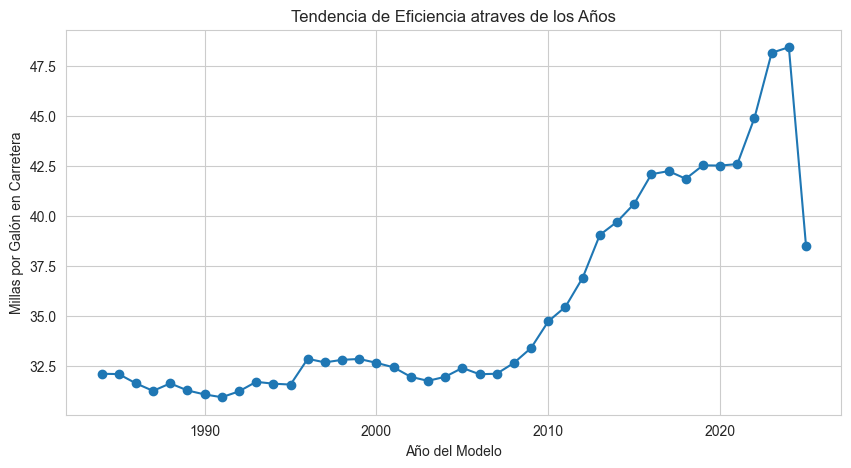

In [5]:
df_comparacion = df[['year', 'UHighway']].dropna()

# Agrupar por año y calcular el promedio de eficiencia en carretera
df_grouped = df_comparacion.groupby('year').mean()

# Graficar la tendencia de eficiencia de combustible en carretera
plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped['UHighway'], marker='o', linestyle='-')

plt.xlabel('Año del Modelo')
plt.ylabel('Millas por Galón en Carretera')
plt.title('Tendencia de Eficiencia atraves de los Años')
plt.grid(True)
plt.show()

¿Cuáles son las 3 marcas que son más eficientes en el consumo de combustible y cuáles son las 3 marcas menos eficientes?

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_29208\667388846.py:2: DtypeWarning: Columns (72,74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


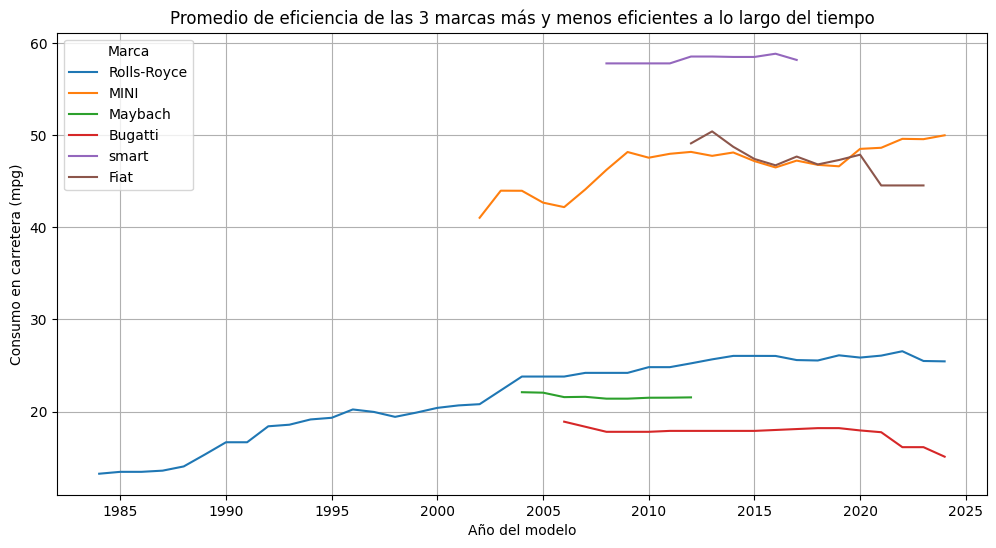

In [ ]:
file_path = "vehicles.csv" 
df = pd.read_csv(file_path)
df_filtered = df[['year', 'UHighway', 'cylinders', 'make', 'VClass']].dropna()

# Convertir los tipos de datos
df_filtered['year'] = df_filtered['year'].astype(int)
df_filtered['UHighway'] = df_filtered['UHighway'].astype(float)

min_data_points = 10  # Número mínimo de datos por marca para ser considerada
df_brand_counts = df_filtered['make'].value_counts()
valid_brands = df_brand_counts[df_brand_counts >= min_data_points].index

# Filtrar solo marcas con suficientes datos
df_valid = df_filtered[df_filtered['make'].isin(valid_brands)]
overall_brand_avg = df_valid.groupby('make')['UHighway'].mean()
top_3_brands = overall_brand_avg.nlargest(3).index
bottom_3_brands = overall_brand_avg.nsmallest(3).index

# Filtrar datos solo para esas marcas
df_top_bottom = df_valid[df_valid['make'].isin(top_3_brands.union(bottom_3_brands))]
df_brand_avg_filtered = df_top_bottom.groupby(['year', 'make'])['UHighway'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_brand_avg_filtered, x="year", y="UHighway", hue="make")
plt.xlabel("Año del modelo")
plt.ylabel("Consumo en carretera (mpg)")
plt.title("Promedio de eficiencia de las 3 marcas más y menos eficientes a lo largo del tiempo")
plt.legend(title="Marca")
plt.grid(True)
plt.show()


# Ejercicio 2

## Inciso A

Librerias

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

Datos

In [8]:
df = pd.read_excel('Canada.xls', sheet_name='Canada by Citizenship')
df_countries = df[(df['Type'] == 'Immigrants') & (df['Coverage'] == 'Foreigners') & (df['OdName'] != 'Unknown')]
years = list(range(1980, 2014))
df_years = df_countries[years]
# Total por año
total_per_year = df_years.sum()

# Proporciones
proportions = df_years.div(total_per_year, axis=1) * 100

<Figure size 8000x1000 with 0 Axes>

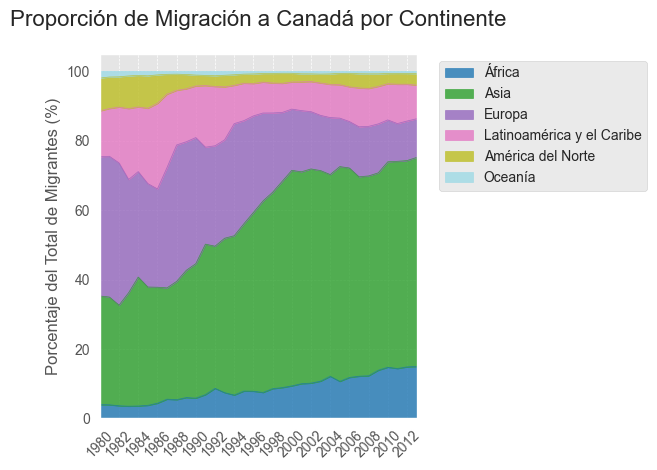

In [9]:
# Agrupamos por continente
continents = df_countries.groupby('AreaName')[years].sum()
continents_proportions = continents.div(total_per_year, axis=1) * 100
#Cambiamos , para que se vea todo en español
continents_spanish = {
    'Africa': 'África',
    'Asia': 'Asia',
    'Europe': 'Europa',
    'Latin America and the Caribbean': 'Latinoamérica y el Caribe',
    'Northern America': 'América del Norte',
    'Oceania': 'Oceanía'
}
continents_proportions.rename(index=continents_spanish, inplace=True)

plt.style.use('ggplot')
plt.figure(figsize=(80, 10))  

# Gráfico de área apilada
continents_proportions.T.plot.area(
    stacked=True,
    colormap='tab20',  
    alpha=0.8,
    linewidth=0.5 
)
plt.title('Proporción de Migración a Canadá por Continente', fontsize=16, pad=20)
plt.ylabel('Porcentaje del Total de Migrantes (%)', fontsize=12)
plt.xticks(range(0, len(years), 2), [str(year) for year in years[::2]], rotation=45) #De dos en dos años
plt.xlim(0, len(years)-1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Inciso B

Librerias

In [10]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pycountry

Datos

In [11]:
def load_and_prepare_data():
    df = pd.read_excel('Canada.xls', sheet_name='Canada by Citizenship')
    df = df.drop(['Type', 'Coverage', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName'], axis=1)
    df = df.rename(columns={'OdName': 'Country'})
    df = df.set_index('Country')
    
    # Eliminamos las filas de totales y desconocidos
    df = df.drop(['Total', 'Unknown'], errors='ignore')
    
    # Convertimos nombres de columnas a enteros (en este caso los años)
    df.columns = pd.to_numeric(df.columns, errors='coerce')
    df = df.dropna(axis=1, how='all')
    
    return df

In [12]:
def get_iso_alpha3(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except:
        # Mapeo manual para países con nombres diferentes
        special_cases = {
            'Bolivia (Plurinational State of)': 'BOL',
            'Brunei Darussalam': 'BRN',
            'China, Hong Kong Special Administrative Region': 'HKG',
            'China, Macao Special Administrative Region': 'MAC',
            'Congo': 'COG',
            "Côte d'Ivoire": 'CIV',
            'Democratic People\'s Republic of Korea': 'PRK',
            'Democratic Republic of the Congo': 'COD',
            'Iran (Islamic Republic of)': 'IRN',
            'Lao People\'s Democratic Republic': 'LAO',
            'Republic of Korea': 'KOR',
            'Republic of Moldova': 'MDA',
            'Russian Federation': 'RUS',
            'State of Palestine': 'PSE',
            'Syrian Arab Republic': 'SYR',
            'The former Yugoslav Republic of Macedonia': 'MKD',
            'United Kingdom of Great Britain and Northern Ireland': 'GBR',
            'United Republic of Tanzania': 'TZA',
            'United States of America': 'USA',
            'Venezuela (Bolivarian Republic of)': 'VEN',
            'Viet Nam': 'VNM',
            'Western Sahara': 'ESH'
        }
        return special_cases.get(country_name, None)

In [13]:
def create_decade_map(df, start_year, end_year, colorscale, title):
    # Datos por década
    decade_data = df.loc[:, start_year:end_year].sum(axis=1).reset_index()
    decade_data.columns = ['Country', 'Total']
    decade_data['ISO_alpha3'] = decade_data['Country'].apply(get_iso_alpha3)
    decade_data = decade_data.dropna(subset=['ISO_alpha3'])
    
    # Mapa base
    fig = px.choropleth(decade_data,
                       locations="ISO_alpha3",
                       color="Total",
                       hover_name="Country",
                       hover_data=["Total"],
                       color_continuous_scale=colorscale,
                       title=title,
                       projection="natural earth",
                       labels={'Total': 'Inmigrantes'})
    
    # Resalte Canadá en rosa, pues las paletas de colores no usan ese color y es llamativo
    fig.add_trace(go.Choropleth(
        locations=['CAN'],
        z=[1],
        colorscale=[[0, '#FF69B4'], [1, '#FF69B4']], 
        showscale=False,
        hoverinfo='none',
        marker_line_width=0
    ))
    
    fig.update_geos(
        showcountries=True,
        showcoastlines=True,
        showland=True,
        landcolor="lightgray"
    )
    
    fig.update_layout(
        margin={"r":0,"t":40,"l":0,"b":0},
        coloraxis_colorbar={
            'title': 'Número de Inmigrantes',
            'thickness': 20,
            'len': 0.5
        }
    )
    
    return fig

Visualizacion de los mapas 

In [14]:
def main():
    df = load_and_prepare_data()
    
    # Mapa para 1980-1989 (Viridis)
    fig_80 = create_decade_map(df, 1980, 1989, 'Viridis', 'Migración a Canadá 1980-1989')
    fig_80.show()
    
    # Mapa para 1990-1999 (Rainbow)
    fig_90 = create_decade_map(df, 1990, 1999, 'Rainbow', 'Migración a Canadá 1990-1999')
    fig_90.show()
    
    # Mapa para 2000-2009 (RdBu)
    fig_00 = create_decade_map(df, 2000, 2009, 'RdBu', 'Migración a Canadá 2000-2009')
    fig_00.show()

if __name__ == "__main__":
    main()